# Uploading CSV from previous EDA

In [56]:
import pandas as pd
import tensorflow as tf

path = "Preprocessing.csv"
df = pd.read_csv(path)


# Preprocessing

In [57]:
df.drop(df[df['gender']=='Other'].index, inplace=True)

## Convert avg_glucose_level

In [58]:
df['avg_glucose_level'].astype('object')
for i, j in zip(df['avg_glucose_level'], df['avg_glucose_level'].index) :
    if i < 70 :
        df.loc[j, 'avg_glucose_level'] = 'Low'
    elif i>=70 and i<140 :
        df.loc[j, 'avg_glucose_level'] = 'Normal'
    elif i>=140 and i<200:
      df.loc[j, 'avg_glucose_level'] = 'Little High'
    else:
        df.loc[j, 'avg_glucose_level'] = 'High'

In [59]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,High,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,High,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,Normal,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,Little High,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,Little High,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,Normal,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,Normal,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,Normal,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,Little High,25.600000,formerly smoked,0


In [60]:
df.replace({'gender' : {'Male' : 1, 'Female':0},
           'ever_married':{'Yes':1, 'No':0},
           'Residence_type':{'Urban':1, 'Rural':0}}, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,High,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,High,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,Normal,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,Little High,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,Little High,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,Normal,28.893237,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,Normal,40.000000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,Normal,30.600000,never smoked,0
5108,1,51.0,0,0,1,Private,0,Little High,25.600000,formerly smoked,0


In [61]:
df = pd.get_dummies(df)

In [62]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,bmi,stroke,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,avg_glucose_level_High,avg_glucose_level_Little High,avg_glucose_level_Low,avg_glucose_level_Normal,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,36.600000,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,28.893237,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,1,80.0,0,1,1,0,32.500000,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,49.0,0,0,1,1,34.400000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,24.000000,1,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,28.893237,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5106,0,81.0,0,0,1,1,40.000000,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,30.600000,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,25.600000,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [63]:
feature = [x for x in df.columns if x != 'stroke']
target = ['stroke']
X = df[feature]
Y = df[target].values


Note:

working type 0 - 4 

average glucose 5 - 8 

smoking status 9 - 12 

gender 13 

age 14

hypertension 15

heart disease 16

ever married 17

recidence 18

bmi 19

## Splitting the dataset into the Training set and Test set

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [65]:
X_test, X_val, Y_test, Y_val = train_test_split(X_val, Y_val, test_size = .34)

In [66]:
X_train.shape

(3576, 20)

In [67]:
X_val.shape

(522, 20)

In [68]:
Y_train, Y_test, Y_val = Y_train.reshape(Y_train.shape[0]), Y_test.reshape(Y_test.shape[0]), Y_val.reshape(Y_val.shape[0])

In [69]:
Y_test.shape

(1011,)

## Feature Scalling

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

# Model

## Naive Bayes

In [70]:
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
nb.fit(X_train, Y_train)

CategoricalNB()

### Predict and Scoring 

In [146]:
%%time
Y_pred = nb.predict(X_test)

Wall time: 8 ms


In [148]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score
def seeAllMetrics(y_true, y_pred) :
    auc = roc_auc_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    precc = precision_score(y_true, y_pred) * 100
    acc = accuracy_score(y_true, y_pred) * 100
    print ('AUC Score        : {}\nRecall Score     : {}\nPrecission Score : {}\nAccuracy Score   : {}'.format(auc, recall, precc, acc))

seeAllMetrics(Y_test, Y_pred)

AUC Score        : 60.514147688060724
Recall Score     : 24.444444444444443
Precission Score : 25.0
Accuracy Score   : 93.3728981206726


## Decission Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'min_samples_split':[2,3,4,5],
          'random_state': [x for x in range(5)]}

gsc = GridSearchCV(dtc, params)
gsc.fit(X_train, Y_train)

print("DTC GridSearch score: "+str(gsc.best_score_))
print("DTC GridSearch params: ")
print(gsc.best_params_)

DTC GridSearch score: 0.9334449349533148
DTC GridSearch params: 
{'criterion': 'gini', 'min_samples_split': 5, 'random_state': 3, 'splitter': 'random'}


In [150]:
dtc = DecisionTreeClassifier(splitter='random', min_samples_split=5, random_state=3)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=3, splitter='random')

### Predict and Scoring 

In [153]:
%%time
Y_pred = dtc.predict(X_test)

Wall time: 6.01 ms


In [152]:
seeAllMetrics(Y_test, Y_pred)

AUC Score        : 50.72118702553485
Recall Score     : 4.444444444444445
Precission Score : 6.451612903225806
Accuracy Score   : 92.87833827893175


## SVC

In [157]:
from sklearn.svm import SVC
svc = SVC()
params = {'C'     : [1000, 10000, 100000],
          'gamma' : [0.5, 0.05,0.005],
          'random_state' : [0,1,2,3,4,5]}

gsc = GridSearchCV(svc, params)
gsc.fit(X_train, Y_train)

print("DTC GridSearch score: "+str(gsc.best_score_))
print("DTC GridSearch params: ")
print(gsc.best_params_)

DTC GridSearch score: 0.9477071531820135
DTC GridSearch params: 
{'C': 1000, 'gamma': 0.5, 'random_state': 0}


In [160]:
svc = SVC(C=1000, gamma = .5, random_state = 0)
svc.fit(X_train, Y_train)

SVC(C=1000, gamma=0.5, random_state=0)

### Predict and Scoring 

In [161]:
%%time
Y_pred = svc.predict(X_test)

Wall time: 569 ms


In [162]:
seeAllMetrics(Y_test, Y_pred)

AUC Score        : 50.69703243616287
Recall Score     : 2.2222222222222223
Precission Score : 11.11111111111111
Accuracy Score   : 94.85657764589516


## Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params = {'n_estimators'     : [100, 1000],
          'random_state' : [0,1,2,3,4,5],
          'max_features' : ['auto','sqrt','log2']}

gsc = GridSearchCV(rfc, params)
gsc.fit(X_train, Y_train)

print("DTC GridSearch score: "+str(gsc.best_score_))
print("DTC GridSearch params: ")
print(gsc.best_params_)

DTC GridSearch score: 0.9524608352541314
DTC GridSearch params: 
{'max_features': 'auto', 'n_estimators': 100, 'random_state': 1}


In [170]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

### Predict and Scoring 

In [171]:
%%time
Y_pred = rfc.predict(X_test)

Wall time: 32.3 ms


In [172]:
seeAllMetrics(Y_test, Y_pred)

AUC Score        : 49.84472049689441
Recall Score     : 0.0
Precission Score : 0.0
Accuracy Score   : 95.25222551928783


## DNN

In [173]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') is not None and logs.get('acc') >= 0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

In [174]:
callbacks = myCallback()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
                                    
])

In [175]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [176]:
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 100, validation_data=(X_val, Y_val))

Epoch 1/100
112/112 [==============================] - 4s 6ms/step - loss: 0.3120 - acc: 0.9027 - val_loss: 0.2402 - val_acc: 0.9272
Epoch 2/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1807 - acc: 0.9536 - val_loss: 0.2334 - val_acc: 0.9272
Epoch 3/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1801 - acc: 0.9536 - val_loss: 0.2301 - val_acc: 0.9272
Epoch 4/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1807 - acc: 0.9536 - val_loss: 0.2345 - val_acc: 0.9272
Epoch 5/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1766 - acc: 0.9536 - val_loss: 0.2448 - val_acc: 0.9272
Epoch 6/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1769 - acc: 0.9536 - val_loss: 0.2355 - val_acc: 0.9272
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 0.1747 - acc: 0.9536 - val_loss: 0.2294 - val_acc: 0.9272
Epoch 8/100
112/112 [==============================] - 0s 2ms/step - 

In [177]:
model.evaluate(X_val, Y_val)

17/17 [==============================] - 0s 2ms/step - loss: 0.2207 - acc: 0.9272


[0.2207314521074295, 0.9272030591964722]

Text(0.5, 1.0, 'Training and validation loss')

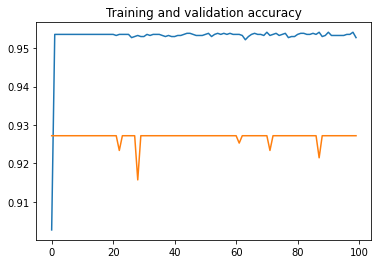

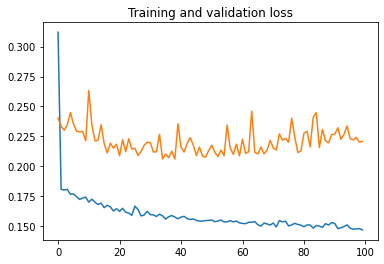

In [178]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [195]:
%%time
Y_pred = model.predict(X_test)

Wall time: 92.8 ms


In [198]:
Y_pred = [1 if x>0.5 else 0 for x in Y_pred]
seeAllMetrics(Y_test, Y_pred)

AUC Score        : 50.0
Recall Score     : 0.0
Precission Score : 0.0
Accuracy Score   : 95.54896142433235


c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Documentasi 26.05.2021

In this Colab, we are doing data preprocessing and making a model. 
For Preprocessing we:

1. Convert column "avg_glucose_level" from numerical data to categorical ("low", "normal", "little high" and "high")

2. Spliting the features and the target

3. Label encoding "gender", "ever married", "recidence type".

4. Hot one encoding "smoking status", "avg_glucose_level", "work_type"

5. Splitting the dataset into Training set and Test set

6. Feature Scalling


For model we using :

1. Naive Bayes

2. Decission Tree

3. SVC

4. Random Forest

5. DNN